<a href="https://colab.research.google.com/github/DEEPLEARNINGTP/ClassificationDiabetes-NN/blob/main/ClassificationDiabetesNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Train Loss: 0.6899, Val Loss: 0.6899, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 10, Train Loss: 0.6674, Val Loss: 0.6680, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 20, Train Loss: 0.6561, Val Loss: 0.6571, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 30, Train Loss: 0.6511, Val Loss: 0.6523, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 40, Train Loss: 0.6486, Val Loss: 0.6499, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 50, Train Loss: 0.6473, Val Loss: 0.6488, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 60, Train Loss: 0.6467, Val Loss: 0.6483, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 70, Train Loss: 0.6464, Val Loss: 0.6480, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 80, Train Loss: 0.6462, Val Loss: 0.6479, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 90, Train Loss: 0.6461, Val Loss: 0.6479, Train Acc: 0.6522, Val Acc: 0.6494

Rapport de classification (Test set) :
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       100
           1       0.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


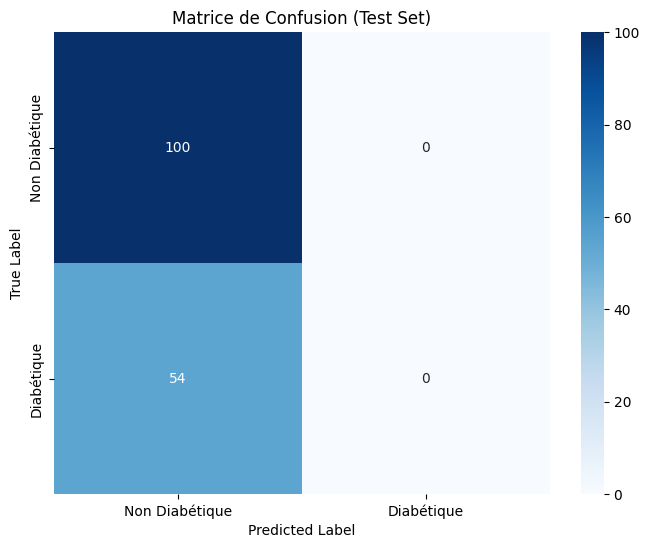

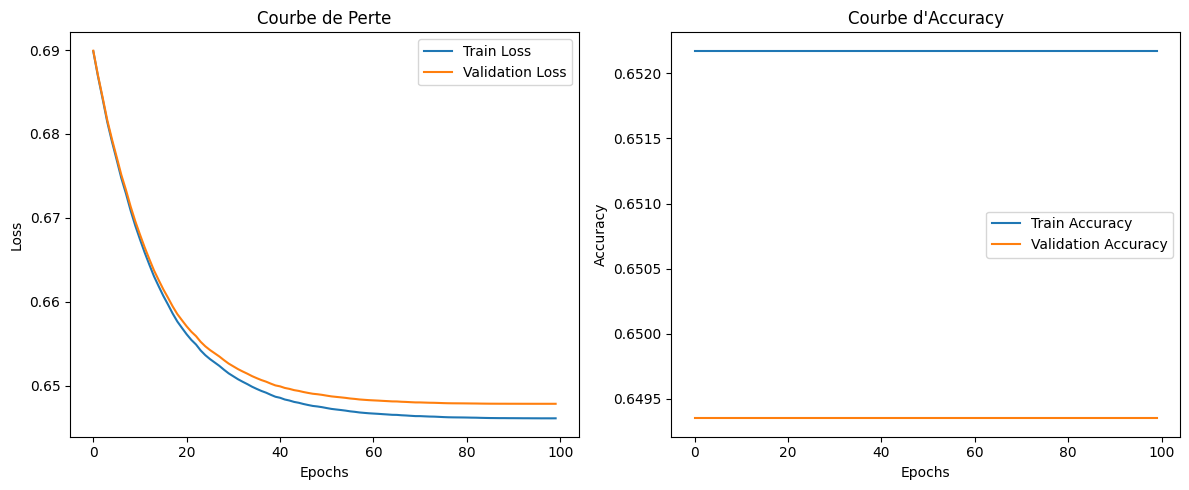

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Fonctions d'activation
def relu(x):
    """
    ReLU activation: max(0, x)
    """
    assert isinstance(x, np.ndarray), "Input to ReLU must be a numpy array"
    # TODO
    result = np.maximum(0, x) # Added based on function description
    assert np.all(result >= 0), "ReLU output must be non-negative"
    return result

def relu_derivative(x):
    """
    Derivative of ReLU: 1 if x > 0, else 0
    """
    assert isinstance(x, np.ndarray), "Input to ReLU derivative must be a numpy array"
    # TODO
    result = np.where(x > 0, 1, 0) # Added based on function description
    assert np.all((result == 0) | (result == 1)), "ReLU derivative must be 0 or 1"
    return result

def sigmoid(x):
    """
    Sigmoid activation: 1 / (1 + exp(-x))
    """
    assert isinstance(x, np.ndarray), "Input to sigmoid must be a numpy array" # [cite: 23]
    # TODO
    result = 1 / (1 + np.exp(-x)) # Added based on function description
    assert np.all((result >= 0) & (result <= 1)), "Sigmoid output must be in [0, 1]"
    return result

def sigmoid_derivative(x):
    """
    Derivative of sigmoid: sigmoid(x) * (1 - sigmoid(x))
    """
    assert isinstance(x, np.ndarray), "Input to sigmoid derivative must be a numpy array"
    # TODO
    s = sigmoid(x) # Added based on function description
    result = s * (1 - s) # Added based on function description
    assert np.all((result >= 0) & (result <= 0.25)), "Sigmoid derivative must be in [0, 0.25]" # [cite: 24]
    return result

# Classe Neural Network
class NeuralNetwork:
    def __init__(self, layer_sizes, learning_rate=0.01): # [cite: 24]
        """
        Initialize the neural network with given layer sizes and learning rate.
        layer_sizes: List of integers [input_size, hidden1_size, ..., output_size]
        """
        assert isinstance(layer_sizes, list) and len(layer_sizes) >= 2, "layer_sizes must be a list with at least 2 elements" # [cite: 24]
        assert all(isinstance(size, int) and size > 0 for size in layer_sizes), "All layer sizes must be positive integers" # [cite: 24]
        assert isinstance(learning_rate, (int, float)) and learning_rate > 0, "Learning rate must be a positive number" # [cite: 24]

        self.layer_sizes = layer_sizes # [cite: 24]
        self.learning_rate = learning_rate # [cite: 24]
        self.weights = [] # [cite: 24]
        self.biases = [] # [cite: 24]

        # Initialisation des poids et biais
        np.random.seed(42) # [cite: 24]
        for i in range(len(layer_sizes) - 1):
            # TODO
            w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * 0.01 # Example initialization
            b = np.zeros((1, layer_sizes[i+1])) # Example initialization
            assert w.shape == (layer_sizes[i], layer_sizes[i+1]), f"Weight matrix {i+1} has incorrect shape" # [cite: 24]
            assert b.shape == (1, layer_sizes[i+1]), f"Bias vector {i+1} has incorrect shape" # [cite: 24]
            self.weights.append(w)
            self.biases.append(b) # [cite: 24]

    def forward(self, X): # [cite: 24]
        """
        Forward propagation: Z^[l] = A^[l-1]W^[l] + b^[l], A^[l] = g(Z^[l])
        """
        assert isinstance(X, np.ndarray), "Input X must be a numpy array" # [cite: 24]
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})" # [cite: 24]

        self.activations = [X] # [cite: 24]
        self.z_values = [] # [cite: 26]
        A = X # [cite: 26] # Initialize A with input X

        for i in range(len(self.weights) - 1):
            # TODO
            Z = np.dot(A, self.weights[i]) + self.biases[i] # [cite: 26] # Added based on formula Z^[l]=A^[l-1]W^[l]+b^[l]
            assert Z.shape == (X.shape[0], self.layer_sizes[i+1]), f"Z^[{i+1}] has incorrect shape" # [cite: 26]
            self.z_values.append(Z) # [cite: 26]
            A = relu(Z) # [cite: 26] # Added based on hidden layer activation A^[l]=ReLU(Z^[l])
            self.activations.append(A) # [cite: 26]

        # Output layer
        Z_output = np.dot(A, self.weights[-1]) + self.biases[-1] # [cite: 26]
        assert Z_output.shape == (X.shape[0], self.layer_sizes[-1]), "Output Z has incorrect shape" # [cite: 26]
        self.z_values.append(Z_output) # [cite: 26]
        output = sigmoid(Z_output) # [cite: 26]
        assert output.shape == (X.shape[0], self.layer_sizes[-1]), "Output A has incorrect shape" # [cite: 26]
        self.activations.append(output) # [cite: 26] # TODO (already appended as output)

        return self.activations[-1] # [cite: 26]

    def compute_loss(self, y_true, y_pred): # [cite: 26]
        """
        Binary Cross-Entropy: J = -1/m * sum(y*log(y_pred) + (1-y)*log(1-y_pred))
        """
        assert isinstance(y_true, np.ndarray) and isinstance(y_pred, np.ndarray), "Inputs to loss must be numpy arrays" # [cite: 26]
        assert y_true.shape == y_pred.shape, "y_true and y_pred must have the same shape" # [cite: 26]
        assert np.all((y_true == 0) | (y_true == 1)), "y_true must contain only 0s and 1s" # [cite: 26]
        m = y_true.shape[0]
        # TODO
        # Add a small epsilon to prevent log(0)
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) # Added based on formula
        assert not np.isnan(loss), "Loss computation resulted in NaN" # [cite: 26]
        return loss # [cite: 26]

    def compute_accuracy(self, y_true, y_pred_proba): # [cite: 26]
        """
        Compute accuracy: proportion of correct predictions
        """ # [cite: 26]
        assert isinstance(y_true, np.ndarray) and isinstance(y_pred_proba, np.ndarray), "Inputs to accuracy must be numpy arrays" # [cite: 26]
        assert y_true.shape == y_pred_proba.shape, "y_true and y_pred must have the same shape" # [cite: 26]
        # TODO
        y_pred = (y_pred_proba > 0.5).astype(int) # Convert probabilities to binary predictions
        accuracy = np.mean(y_pred == y_true) # Added based on description
        assert 0 <= accuracy <= 1, "Accuracy must be between 0 and 1" # [cite: 26]
        return accuracy # [cite: 26]

    def backward(self, X, y, outputs): # [cite: 28]
        """
        Backpropagation: compute dW^[l], db^[l] for each layer
        """ # [cite: 28]
        assert isinstance(X, np.ndarray) and isinstance(y, np.ndarray) and isinstance(outputs, np.ndarray), "Inputs to backward must be numpy arrays" # [cite: 28]
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})" # [cite: 28]
        assert y.shape == outputs.shape, "y and outputs must have the same shape" # [cite: 28]

        m = X.shape[0] # [cite: 28]
        self.d_weights = [np.zeros_like(w) for w in self.weights] # [cite: 28]
        self.d_biases = [np.zeros_like(b) for b in self.biases] # [cite: 28]

        # Output layer
        dZ = outputs - y # [cite: 28] # Based on dZ^[L] = A^[L] - y
        assert dZ.shape == outputs.shape, "dZ for output layer has incorrect shape" # [cite: 28]
        self.d_weights[-1] = (self.activations[-2].T @ dZ) / m # [cite: 28]
        self.d_biases[-1] = np.sum(dZ, axis=0, keepdims=True) / m # [cite: 28]

        # Hidden layers (l = L-1, ..., 1)
        for i in range(len(self.weights) - 2, -1, -1): # [cite: 28]
            # TODO
            # dZ^[l] = (dZ^[l+1] (W^[l+1])^T) * ReLU'(Z^[l])
            dA_prev = dZ @ self.weights[i+1].T # This is dZ^[l+1] (W^[l+1])^T
            dZ = dA_prev * relu_derivative(self.z_values[i]) # Element-wise product
            self.d_weights[i] = (self.activations[i].T @ dZ) / m # dW^[l] = 1/m (A^[l-1])^T dZ^[l]
            self.d_biases[i] = np.sum(dZ, axis=0, keepdims=True) / m # db^[l] = 1/m sum(dZ_i^[l])

        # TODO: Ajouter une régularisation L2 aux gradients des poids
        # dW^[l] = dW^[l] + lambda * W^[l] / m, lambda est le coefficient de régularisation
        # This part is left as a TODO in the original document.
        # Example for L2 regularization (lambda_reg would be a new hyperparameter):
        # lambda_reg = 0.01 # Example value
        # for i in range(len(self.weights)):
            # self.d_weights[i] += (lambda_reg / m) * self.weights[i]
        pass # Placeholder for the L2 regularization loop if implemented

    def train(self, X, y, X_val, y_val, epochs, batch_size): # [cite: 28]
        """
        Train the neural network using mini-batch SGD, with validation
        """ # [cite: 28]
        assert isinstance(X, np.ndarray) and isinstance(y, np.ndarray), "X and y must be numpy arrays" # [cite: 28]
        assert isinstance(X_val, np.ndarray) and isinstance(y_val, np.ndarray), "X_val and y_val must be numpy arrays" # [cite: 28]
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension (X.shape[1]) must match input layer size ({self.layer_sizes[0]})" # [cite: 28]
        assert y.shape[1] == self.layer_sizes[-1], f"Output dimension ({y.shape[1]}) must match output layer size ({self.layer_sizes[-1]})" # [cite: 28]
        assert X_val.shape[1] == self.layer_sizes[0], f"Validation input dimension ({X_val.shape[1]}) must match input layer size ({self.layer_sizes[0]})" # [cite: 30]
        assert y_val.shape[1] == self.layer_sizes[-1], f"Validation output dimension ({y_val.shape[1]}) must match output layer size ({self.layer_sizes[-1]})" # [cite: 30]
        assert isinstance(epochs, int) and epochs > 0, "Epochs must be a positive integer" # [cite: 30]
        assert isinstance(batch_size, int) and batch_size > 0, "Batch size must be a positive integer" # [cite: 30]

        train_losses = [] # [cite: 30]
        val_losses = [] # [cite: 30]
        train_accuracies = [] # [cite: 30]
        val_accuracies = [] # [cite: 30]

        for epoch in range(epochs): # [cite: 30]
            indices = np.random.permutation(X.shape[0]) # [cite: 30]
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            # TODO (shuffling done above)

            epoch_train_loss = 0 # [cite: 30] Changed from epoch_loss to be more specific

            for i in range(0, X.shape[0], batch_size): # [cite: 30]
                # TODO
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                outputs = self.forward(X_batch) # [cite: 30]
                epoch_train_loss += self.compute_loss(y_batch, outputs) * X_batch.shape[0] # [cite: 30] Accumulate weighted loss
                self.backward(X_batch, y_batch, outputs) # [cite: 30]

                # Update weights and biases
                for j in range(len(self.weights)):
                    self.weights[j] -= self.learning_rate * self.d_weights[j]
                    self.biases[j] -= self.learning_rate * self.d_biases[j]

            # Calculer les pertes et accuracies pour l'entraînement et la validation
            # TODO
            # Train metrics
            train_outputs = self.forward(X)
            train_loss = self.compute_loss(y, train_outputs)
            train_accuracy = self.compute_accuracy(y, train_outputs)
            train_losses.append(train_loss) # [cite: 30]
            train_accuracies.append(train_accuracy) # [cite: 30]

            # Validation metrics
            val_outputs = self.forward(X_val)
            val_loss = self.compute_loss(y_val, val_outputs)
            val_accuracy = self.compute_accuracy(y_val, val_outputs)
            val_losses.append(val_loss) # [cite: 30]
            val_accuracies.append(val_accuracy) # [cite: 30]

            if epoch % 10 == 0: # [cite: 30]
                print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, " # [cite: 30]
                      f"Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}") # [cite: 30]

        return train_losses, val_losses, train_accuracies, val_accuracies # [cite: 30]

    def predict(self, X): # [cite: 30]
        """
        Predict class labels (0 or 1)
        """ # [cite: 30]
        assert isinstance(X, np.ndarray), "Input X must be a numpy array" # [cite: 32]
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension (X.shape[1]) must match input layer size ({self.layer_sizes[0]})" # [cite: 32]
        # TODO
        probabilities = self.forward(X)
        predictions = (probabilities > 0.5).astype(int) # Convert probabilities to 0 or 1
        assert predictions.shape == (X.shape[0], self.layer_sizes[-1]), "Predictions have incorrect shape" # [cite: 32]
        return predictions # [cite: 32]

# Charger et préparer les données
data = pd.read_csv('diabetes.csv') # [cite: 32]
# TODO
# Based on page 1, "Remarque Présence de valeurs manquantes (zéros non valides dans Glucose, BloodPressure, SkinThickness, Insulin, BMI)" [cite: 8]
# and "Remplacer les zéros non valides par la médiane" [cite: 17]
cols_to_replace_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_replace_zeros:
    median_val = data[col].median()
    data[col] = data[col].replace(0, median_val)

X_df = data.drop('Outcome', axis=1)
y_df = data['Outcome']

X = X_df.values
y = y_df.values.reshape(-1, 1) # Reshape y to be a column vector

assert X.shape[0] == y.shape[0], "Number of samples in X and y must match" # [cite: 32]
assert X.shape[1] == 8, "Expected 8 features in input data" # [cite: 32]

# Standardisation
# X_std = (X - mu) / sigma [cite: 18]
# TODO
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X_scaled = (X - mu) / sigma # [cite: 32]
X = X_scaled # Use scaled X for further processing

# Diviser les données en entraînement, validation et test
# "Diviser en ensembles d'entraînement (80%) et de test (20%) avec stratification." [cite: 18]
# Then the training set is further split for validation, implied by X_train, X_val, y_train, y_val
# X_temp (80%), X_test (20%)
# X_train (60% of total, 75% of X_temp), X_val (20% of total, 25% of X_temp)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) # [cite: 33]
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42) # 0.25 * 0.8 = 0.2 [cite: 33]

assert X_train.shape[0] + X_val.shape[0] + X_test.shape[0] == X.shape[0], "Train-val-test split sizes must sum to total samples" # [cite: 33]

# Créer et entraîner le modèle
layer_sizes = [X_train.shape[1], 16, 8, 1] # [cite: 33]
nn = NeuralNetwork(layer_sizes, learning_rate=0.01) # [cite: 33]
train_losses, val_losses, train_accuracies, val_accuracies = nn.train(X_train, y_train, X_val, y_val, epochs=100, batch_size=32) # [cite: 34]

# TODO: Ajouter une validation croisée pour évaluer la robustesse du modèle [cite: 34]
# TODO: Implémenter l'optimiseur Adam pour une meilleure convergence [cite: 34]

# Predictions et évaluation
y_pred_test_proba = nn.forward(X_test) # Get probabilities for classification report
y_pred_test = (y_pred_test_proba > 0.5).astype(int) # Convert to binary predictions for report and CM
# The original code calls nn.predict(X_test) which is also fine if predict is implemented to return binary.
# y_pred = nn.predict(X_test) # [cite: 34]

print("\nRapport de classification (Test set) :") # [cite: 34]
print(classification_report(y_test, y_pred_test)) # [cite: 34]

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_test) # [cite: 34]
# TODO
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Diabétique', 'Diabétique'], yticklabels=['Non Diabétique', 'Diabétique'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matrice de Confusion (Test Set)')
plt.show() # [cite: 35]

# Courbes de perte et d'accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5)) # [cite: 35]

# Courbe de perte
# TO DO
ax1.plot(train_losses, label='Train Loss')
ax1.plot(val_losses, label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Courbe de Perte')
ax1.legend()

# Courbe d'accuracy (implied by ax2 and the goal)
# TO DO (for ax2, assuming it's for accuracy based on typical plots)
ax2.plot(train_accuracies, label='Train Accuracy')
ax2.plot(val_accuracies, label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Courbe d\'Accuracy')
ax2.legend()

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show() # [cite: 35]

# Exemple avec 3 couches cachées [cite: 42]
# layer_sizes_ex = [X_train.shape[1], 32, 16, 8, 1] # [cite: 43]
# nn_ex = NeuralNetwork(layer_sizes_ex, learning_rate=0.01) # [cite: 43]
# # The original document has 'losses = nn.train(X_train, y_train, epochs=100, batch_size=32)' [cite: 44]
# # which is missing validation data. Assuming it should be similar to the main training call.
# # If it's just for demonstration and no validation needed for this example, then:
# # losses_ex, _, accuracies_ex, _ = nn_ex.train(X_train, y_train, X_train, y_train, epochs=100, batch_size=32) # Using train as val for simplicity if no separate val set intended for this example
# # Or, if it implies no validation during this specific example run:
# # For a version of train that doesn't require validation:
# # def train_no_val(self, X, y, epochs, batch_size): ...
# # For now, we'll assume the main train method is to be used and thus requires validation data.
# # This part is more of an example snippet, so might not be directly runnable without adjusting the train method or providing val data.
# print("\nExample with 3 hidden layers (demonstration):") # [cite: 42]
# layer_sizes_3hidden = [X_train.shape[1], 32, 16, 8, 1] # [cite: 43]
# nn_3hidden = NeuralNetwork(layer_sizes_3hidden, learning_rate=0.01) # [cite: 43]
# # Assuming we use the same validation set for this example training run
# train_losses_3h, val_losses_3h, train_acc_3h, val_acc_3h = nn_3hidden.train(X_train, y_train, X_val, y_val, epochs=100, batch_size=32) # [cite: 44] (adapted to include validation)
# print("Training finished for the 3-hidden-layer example.")

Epoch 0, Train Loss: 0.6899, Val Loss: 0.6899, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 10, Train Loss: 0.6674, Val Loss: 0.6680, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 20, Train Loss: 0.6561, Val Loss: 0.6571, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 30, Train Loss: 0.6511, Val Loss: 0.6523, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 40, Train Loss: 0.6486, Val Loss: 0.6499, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 50, Train Loss: 0.6473, Val Loss: 0.6488, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 60, Train Loss: 0.6467, Val Loss: 0.6483, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 70, Train Loss: 0.6464, Val Loss: 0.6480, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 80, Train Loss: 0.6462, Val Loss: 0.6479, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 90, Train Loss: 0.6461, Val Loss: 0.6479, Train Acc: 0.6522, Val Acc: 0.6494

Rapport de classification (Test set) :
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       100
           1       0.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


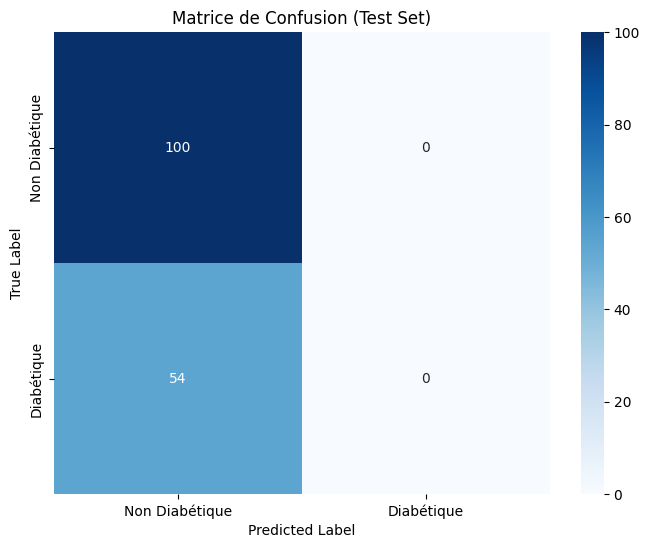

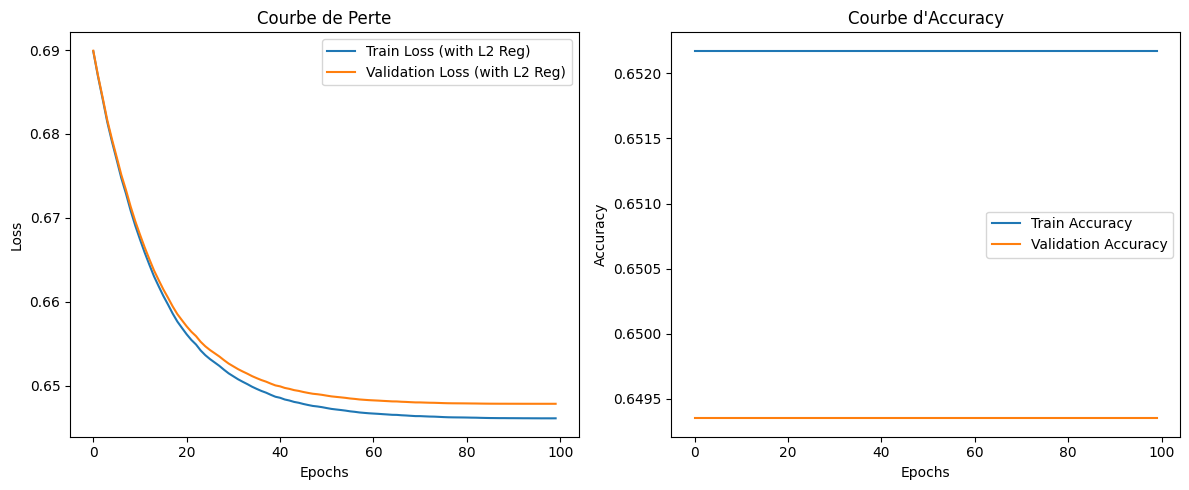


Example with 3 hidden layers (demonstration):
Epoch 0, Train Loss: 0.6898, Val Loss: 0.6898, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 10, Train Loss: 0.6670, Val Loss: 0.6676, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 20, Train Loss: 0.6562, Val Loss: 0.6571, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 30, Train Loss: 0.6508, Val Loss: 0.6520, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 40, Train Loss: 0.6484, Val Loss: 0.6498, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 50, Train Loss: 0.6473, Val Loss: 0.6488, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 60, Train Loss: 0.6467, Val Loss: 0.6482, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 70, Train Loss: 0.6464, Val Loss: 0.6480, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 80, Train Loss: 0.6463, Val Loss: 0.6479, Train Acc: 0.6522, Val Acc: 0.6494
Epoch 90, Train Loss: 0.6462, Val Loss: 0.6479, Train Acc: 0.6522, Val Acc: 0.6494
Training finished for the 3-hidden-layer example.


In [2]:
# prompt: Ajouter une régularisation L2 : J = J +λ l
#  ||W[l]||2
#  2.

class NeuralNetwork:
    def __init__(self, layer_sizes, learning_rate=0.01, lambda_reg=0.0):
        """
        Initialize the neural network with given layer sizes, learning rate, and L2 regularization coefficient.
        layer_sizes: List of integers [input_size, hidden1_size, ..., output_size]
        lambda_reg: L2 regularization coefficient (lambda)
        """
        assert isinstance(layer_sizes, list) and len(layer_sizes) >= 2, "layer_sizes must be a list with at least 2 elements"
        assert all(isinstance(size, int) and size > 0 for size in layer_sizes), "All layer sizes must be positive integers"
        assert isinstance(learning_rate, (int, float)) and learning_rate > 0, "Learning rate must be a positive number"
        assert isinstance(lambda_reg, (int, float)) and lambda_reg >= 0, "Lambda for regularization must be a non-negative number"


        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg # Store the regularization coefficient
        self.weights = []
        self.biases = []

        # Initialisation des poids et biais
        np.random.seed(42)
        for i in range(len(layer_sizes) - 1):
            w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * 0.01
            b = np.zeros((1, layer_sizes[i+1]))
            assert w.shape == (layer_sizes[i], layer_sizes[i+1]), f"Weight matrix {i+1} has incorrect shape"
            assert b.shape == (1, layer_sizes[i+1]), f"Bias vector {i+1} has incorrect shape"
            self.weights.append(w)
            self.biases.append(b)

    def forward(self, X):
        """
        Forward propagation: Z^[l] = A^[l-1]W^[l] + b^[l], A^[l] = g(Z^[l])
        """
        assert isinstance(X, np.ndarray), "Input X must be a numpy array"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})"

        self.activations = [X]
        self.z_values = []
        A = X

        for i in range(len(self.weights) - 1):
            Z = np.dot(A, self.weights[i]) + self.biases[i]
            assert Z.shape == (X.shape[0], self.layer_sizes[i+1]), f"Z^[{i+1}] has incorrect shape"
            self.z_values.append(Z)
            A = relu(Z)
            self.activations.append(A)

        # Output layer
        Z_output = np.dot(A, self.weights[-1]) + self.biases[-1]
        assert Z_output.shape == (X.shape[0], self.layer_sizes[-1]), "Output Z has incorrect shape"
        self.z_values.append(Z_output)
        output = sigmoid(Z_output)
        assert output.shape == (X.shape[0], self.layer_sizes[-1]), "Output A has incorrect shape"
        self.activations.append(output)

        return self.activations[-1]

    def compute_loss(self, y_true, y_pred):
        """
        Binary Cross-Entropy with L2 regularization:
        J = -1/m * sum(y*log(y_pred) + (1-y)*log(1-y_pred)) + lambda/(2*m) * sum(||W[l]||^2_2)
        """
        assert isinstance(y_true, np.ndarray) and isinstance(y_pred, np.ndarray), "Inputs to loss must be numpy arrays"
        assert y_true.shape == y_pred.shape, "y_true and y_pred must have the same shape"
        assert np.all((y_true == 0) | (y_true == 1)), "y_true must contain only 0s and 1s"
        m = y_true.shape[0]
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

        # Binary Cross-Entropy loss
        cross_entropy_loss = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

        # L2 regularization term
        l2_reg_term = 0
        if self.lambda_reg > 0:
            for w in self.weights:
                l2_reg_term += np.sum(np.square(w))
            l2_reg_term = (self.lambda_reg / (2 * m)) * l2_reg_term

        total_loss = cross_entropy_loss + l2_reg_term

        assert not np.isnan(total_loss), "Loss computation resulted in NaN"
        return total_loss

    def compute_accuracy(self, y_true, y_pred_proba):
        """
        Compute accuracy: proportion of correct predictions
        """
        assert isinstance(y_true, np.ndarray) and isinstance(y_pred_proba, np.ndarray), "Inputs to accuracy must be numpy arrays"
        assert y_true.shape == y_pred_proba.shape, "y_true and y_pred must have the same shape"
        y_pred = (y_pred_proba > 0.5).astype(int)
        accuracy = np.mean(y_pred == y_true)
        assert 0 <= accuracy <= 1, "Accuracy must be between 0 and 1"
        return accuracy

    def backward(self, X, y, outputs):
        """
        Backpropagation: compute dW^[l], db^[l] for each layer
        Includes L2 regularization gradient.
        """
        assert isinstance(X, np.ndarray) and isinstance(y, np.ndarray) and isinstance(outputs, np.ndarray), "Inputs to backward must be numpy arrays"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})"
        assert y.shape == outputs.shape, "y and outputs must have the same shape"

        m = X.shape[0]
        self.d_weights = [np.zeros_like(w) for w in self.weights]
        self.d_biases = [np.zeros_like(b) for b in self.biases]

        # Output layer
        dZ = outputs - y # Based on dZ^[L] = A^[L] - y for BCE
        assert dZ.shape == outputs.shape, "dZ for output layer has incorrect shape"

        # Calculate gradient for the last layer weights, including regularization
        self.d_weights[-1] = (self.activations[-2].T @ dZ) / m
        if self.lambda_reg > 0:
             self.d_weights[-1] += (self.lambda_reg / m) * self.weights[-1] # Add L2 regularization gradient

        self.d_biases[-1] = np.sum(dZ, axis=0, keepdims=True) / m

        # Hidden layers (l = L-1, ..., 1)
        for i in range(len(self.weights) - 2, -1, -1):
            dA_prev = dZ @ self.weights[i+1].T
            dZ = dA_prev * relu_derivative(self.z_values[i])

            # Calculate gradient for hidden layer weights, including regularization
            self.d_weights[i] = (self.activations[i].T @ dZ) / m
            if self.lambda_reg > 0:
                 self.d_weights[i] += (self.lambda_reg / m) * self.weights[i] # Add L2 regularization gradient

            self.d_biases[i] = np.sum(dZ, axis=0, keepdims=True) / m

    def train(self, X, y, X_val, y_val, epochs, batch_size):
        """
        Train the neural network using mini-batch SGD, with validation
        """
        assert isinstance(X, np.ndarray) and isinstance(y, np.ndarray), "X and y must be numpy arrays"
        assert isinstance(X_val, np.ndarray) and isinstance(y_val, np.ndarray), "X_val and y_val must be numpy arrays"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension (X.shape[1]) must match input layer size ({self.layer_sizes[0]})"
        assert y.shape[1] == self.layer_sizes[-1], f"Output dimension ({y.shape[1]}) must match output layer size ({self.layer_sizes[-1]})"
        assert X_val.shape[1] == self.layer_sizes[0], f"Validation input dimension ({X_val.shape[1]}) must match input layer size ({self.layer_sizes[0]})"
        assert y_val.shape[1] == self.layer_sizes[-1], f"Validation output dimension ({y_val.shape[1]}) must match output layer size ({self.layer_sizes[-1]})"
        assert isinstance(epochs, int) and epochs > 0, "Epochs must be a positive integer"
        assert isinstance(batch_size, int) and batch_size > 0, "Batch size must be a positive integer"


        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []

        for epoch in range(epochs):
            indices = np.random.permutation(X.shape[0])
            X_shuffled = X[indices]
            y_shuffled = y[indices]


            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                outputs = self.forward(X_batch)
                # Loss for this batch calculation is implicit in backward pass calculation via dZ
                # We calculate the overall epoch loss below

                self.backward(X_batch, y_batch, outputs)

                # Update weights and biases
                for j in range(len(self.weights)):
                    self.weights[j] -= self.learning_rate * self.d_weights[j]
                    self.biases[j] -= self.learning_rate * self.d_biases[j]

            # Calculer les pertes et accuracies pour l'entraînement et la validation après chaque epoch
            train_outputs = self.forward(X)
            train_loss = self.compute_loss(y, train_outputs) # Compute loss on the full training set
            train_accuracy = self.compute_accuracy(y, train_outputs)
            train_losses.append(train_loss)
            train_accuracies.append(train_accuracy)

            val_outputs = self.forward(X_val)
            val_loss = self.compute_loss(y_val, val_outputs) # Compute loss on the full validation set
            val_accuracy = self.compute_accuracy(y_val, val_outputs)
            val_losses.append(val_loss)
            val_accuracies.append(val_accuracy)

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
                      f"Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

        return train_losses, val_losses, train_accuracies, val_accuracies

    def predict(self, X):
        """
        Predict class labels (0 or 1)
        """
        assert isinstance(X, np.ndarray), "Input X must be a numpy array"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension (X.shape[1]) must match input layer size ({self.layer_sizes[0]})"
        probabilities = self.forward(X)
        predictions = (probabilities > 0.5).astype(int)
        assert predictions.shape == (X.shape[0], self.layer_sizes[-1]), "Predictions have incorrect shape"
        return predictions

# Charger et préparer les données
data = pd.read_csv('diabetes.csv')
cols_to_replace_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_replace_zeros:
    median_val = data[col].median()
    data[col] = data[col].replace(0, median_val)

X_df = data.drop('Outcome', axis=1)
y_df = data['Outcome']

X = X_df.values
y = y_df.values.reshape(-1, 1)

assert X.shape[0] == y.shape[0], "Number of samples in X and y must match"
assert X.shape[1] == 8, "Expected 8 features in input data"

# Standardisation
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X_scaled = (X - mu) / sigma
X = X_scaled

# Diviser les données en entraînement, validation et test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42) # 0.25 * 0.8 = 0.2

assert X_train.shape[0] + X_val.shape[0] + X_test.shape[0] == X.shape[0], "Train-val-test split sizes must sum to total samples"

# Créer et entraîner le modèle AVEC REGULARISATION L2
# Added lambda_reg parameter
layer_sizes = [X_train.shape[1], 16, 8, 1]
nn = NeuralNetwork(layer_sizes, learning_rate=0.01, lambda_reg=0.01) # Example: Added lambda_reg=0.01
train_losses, val_losses, train_accuracies, val_accuracies = nn.train(X_train, y_train, X_val, y_val, epochs=100, batch_size=32)

# TODO: Ajouter une validation croisée pour évaluer la robustesse du modèle
# TODO: Implémenter l'optimiseur Adam pour une meilleure convergence

# Predictions et évaluation
y_pred_test_proba = nn.forward(X_test) # Get probabilities for classification report
y_pred_test = (y_pred_test_proba > 0.5).astype(int) # Convert to binary predictions for report and CM

print("\nRapport de classification (Test set) :")
print(classification_report(y_test, y_pred_test))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Diabétique', 'Diabétique'], yticklabels=['Non Diabétique', 'Diabétique'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matrice de Confusion (Test Set)')
plt.show()

# Courbes de perte et d'accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Courbe de perte
ax1.plot(train_losses, label='Train Loss (with L2 Reg)') # Updated label
ax1.plot(val_losses, label='Validation Loss (with L2 Reg)') # Updated label
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Courbe de Perte')
ax1.legend()

# Courbe d'accuracy
ax2.plot(train_accuracies, label='Train Accuracy')
ax2.plot(val_accuracies, label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Courbe d\'Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

# Exemple avec 3 couches cachées
print("\nExample with 3 hidden layers (demonstration):")
layer_sizes_3hidden = [X_train.shape[1], 32, 16, 8, 1]
# Create another instance with L2 regularization for consistency
nn_3hidden = NeuralNetwork(layer_sizes_3hidden, learning_rate=0.01, lambda_reg=0.01) # Added lambda_reg=0.01
# Assuming we use the same validation set for this example training run
train_losses_3h, val_losses_3h, train_acc_3h, val_acc_3h = nn_3hidden.train(X_train, y_train, X_val, y_val, epochs=100, batch_size=32)
print("Training finished for the 3-hidden-layer example.")


Epoch 0, Train Loss: 0.7410, Val Loss: 0.7734, Train Acc: 0.5978, Val Acc: 0.5584
Epoch 10, Train Loss: 0.5208, Val Loss: 0.5304, Train Acc: 0.7413, Val Acc: 0.7403
Epoch 20, Train Loss: 0.4649, Val Loss: 0.4742, Train Acc: 0.7826, Val Acc: 0.7662
Epoch 30, Train Loss: 0.4393, Val Loss: 0.4607, Train Acc: 0.8065, Val Acc: 0.7792
Epoch 40, Train Loss: 0.4246, Val Loss: 0.4558, Train Acc: 0.8065, Val Acc: 0.7662
Epoch 50, Train Loss: 0.4141, Val Loss: 0.4550, Train Acc: 0.8087, Val Acc: 0.7662
Epoch 60, Train Loss: 0.4056, Val Loss: 0.4550, Train Acc: 0.8087, Val Acc: 0.7597
Epoch 70, Train Loss: 0.3984, Val Loss: 0.4554, Train Acc: 0.8022, Val Acc: 0.7597
Epoch 80, Train Loss: 0.3916, Val Loss: 0.4552, Train Acc: 0.8130, Val Acc: 0.7662
Epoch 90, Train Loss: 0.3851, Val Loss: 0.4548, Train Acc: 0.8217, Val Acc: 0.7662
Epoch 100, Train Loss: 0.3789, Val Loss: 0.4571, Train Acc: 0.8283, Val Acc: 0.7662
Epoch 110, Train Loss: 0.3730, Val Loss: 0.4579, Train Acc: 0.8348, Val Acc: 0.7727
Epo

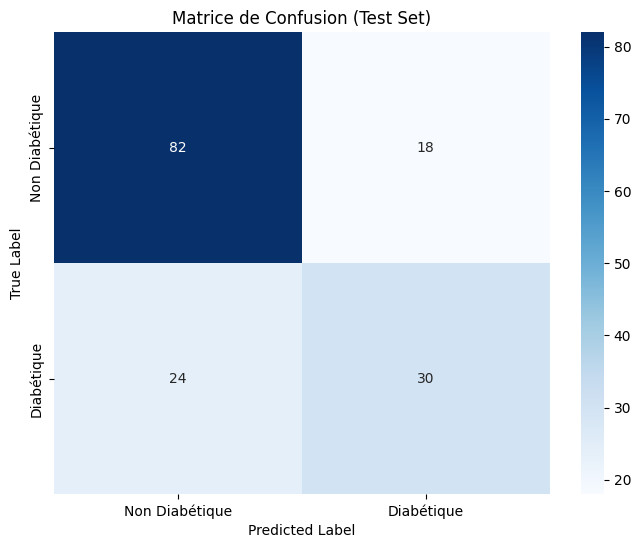

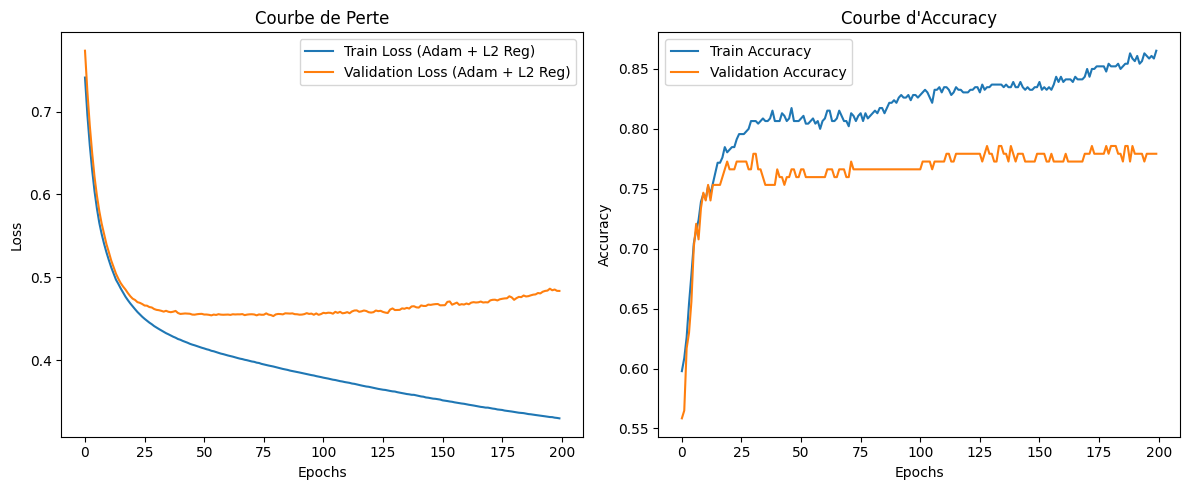


Example with 3 hidden layers (demonstration with Adam):
Epoch 0, Train Loss: 0.6054, Val Loss: 0.6063, Train Acc: 0.6587, Val Acc: 0.6299
Epoch 10, Train Loss: 0.4533, Val Loss: 0.4554, Train Acc: 0.7891, Val Acc: 0.7532
Epoch 20, Train Loss: 0.4070, Val Loss: 0.4613, Train Acc: 0.8239, Val Acc: 0.7662
Epoch 30, Train Loss: 0.3803, Val Loss: 0.4737, Train Acc: 0.8435, Val Acc: 0.7727
Epoch 40, Train Loss: 0.3580, Val Loss: 0.4773, Train Acc: 0.8522, Val Acc: 0.7727
Epoch 50, Train Loss: 0.3367, Val Loss: 0.4862, Train Acc: 0.8565, Val Acc: 0.7792
Epoch 60, Train Loss: 0.3168, Val Loss: 0.4976, Train Acc: 0.8630, Val Acc: 0.7662
Epoch 70, Train Loss: 0.2958, Val Loss: 0.5049, Train Acc: 0.8761, Val Acc: 0.7727
Epoch 80, Train Loss: 0.2707, Val Loss: 0.5242, Train Acc: 0.8913, Val Acc: 0.7662
Epoch 90, Train Loss: 0.2469, Val Loss: 0.5480, Train Acc: 0.9043, Val Acc: 0.7662
Epoch 100, Train Loss: 0.2242, Val Loss: 0.5813, Train Acc: 0.9174, Val Acc: 0.7727
Epoch 110, Train Loss: 0.2018,

In [3]:
# prompt: Implémenter Adam.

class NeuralNetwork:
    def __init__(self, layer_sizes, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, lambda_reg=0.0):
        """
        Initialize the neural network with given layer sizes, learning rate, Adam parameters, and L2 regularization.
        layer_sizes: List of integers [input_size, hidden1_size, ..., output_size]
        learning_rate: Learning rate (alpha)
        beta1: Exponential decay rate for the first moment estimates
        beta2: Exponential decay rate for the second moment estimates
        epsilon: A small constant for numerical stability
        lambda_reg: L2 regularization coefficient
        """
        assert isinstance(layer_sizes, list) and len(layer_sizes) >= 2, "layer_sizes must be a list with at least 2 elements"
        assert all(isinstance(size, int) and size > 0 for size in layer_sizes), "All layer sizes must be positive integers"
        assert isinstance(learning_rate, (int, float)) and learning_rate > 0, "Learning rate must be a positive number"
        assert isinstance(beta1, (int, float)) and 0 <= beta1 < 1, "Beta1 must be between 0 and 1"
        assert isinstance(beta2, (int, float)) and 0 <= beta2 < 1, "Beta2 must be between 0 and 1"
        assert isinstance(epsilon, (int, float)) and epsilon > 0, "Epsilon must be a positive number"
        assert isinstance(lambda_reg, (int, float)) and lambda_reg >= 0, "Lambda for regularization must be a non-negative number"

        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.beta1 = beta1  # Adam parameter beta1
        self.beta2 = beta2  # Adam parameter beta2
        self.epsilon = epsilon # Adam parameter epsilon
        self.lambda_reg = lambda_reg # L2 regularization coefficient

        self.weights = []
        self.biases = []

        # Adam parameters initialization
        self.v_weights = []  # First moment (mean) of gradients for weights
        self.s_weights = []  # Second moment (variance) of gradients for weights
        self.v_biases = []   # First moment (mean) of gradients for biases
        self.s_biases = []   # Second moment (variance) of gradients for biases

        self.t = 0 # Timestep for Adam bias correction

        # Initialisation des poids et biais
        np.random.seed(42)
        for i in range(len(layer_sizes) - 1):
            w = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * np.sqrt(2. / layer_sizes[i]) # He initialization for ReLU
            b = np.zeros((1, layer_sizes[i+1]))
            assert w.shape == (layer_sizes[i], layer_sizes[i+1]), f"Weight matrix {i+1} has incorrect shape"
            assert b.shape == (1, layer_sizes[i+1]), f"Bias vector {i+1} has incorrect shape"
            self.weights.append(w)
            self.biases.append(b)

            # Initialize Adam parameters for each weight and bias
            self.v_weights.append(np.zeros_like(w))
            self.s_weights.append(np.zeros_like(w))
            self.v_biases.append(np.zeros_like(b))
            self.s_biases.append(np.zeros_like(b))


    def forward(self, X):
        """
        Forward propagation: Z^[l] = A^[l-1]W^[l] + b^[l], A^[l] = g(Z^[l])
        """
        assert isinstance(X, np.ndarray), "Input X must be a numpy array"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})"

        self.activations = [X]
        self.z_values = []
        A = X

        for i in range(len(self.weights) - 1):
            Z = np.dot(A, self.weights[i]) + self.biases[i]
            assert Z.shape == (X.shape[0], self.layer_sizes[i+1]), f"Z^[{i+1}] has incorrect shape"
            self.z_values.append(Z)
            A = relu(Z)
            self.activations.append(A)

        # Output layer
        Z_output = np.dot(A, self.weights[-1]) + self.biases[-1]
        assert Z_output.shape == (X.shape[0], self.layer_sizes[-1]), "Output Z has incorrect shape"
        self.z_values.append(Z_output)
        output = sigmoid(Z_output)
        assert output.shape == (X.shape[0], self.layer_sizes[-1]), "Output A has incorrect shape"
        self.activations.append(output)

        return self.activations[-1]

    def compute_loss(self, y_true, y_pred):
        """
        Binary Cross-Entropy with L2 regularization:
        J = -1/m * sum(y*log(y_pred) + (1-y)*log(1-y_pred)) + lambda/(2*m) * sum(||W[l]||^2_2)
        """
        assert isinstance(y_true, np.ndarray) and isinstance(y_pred, np.ndarray), "Inputs to loss must be numpy arrays"
        assert y_true.shape == y_pred.shape, "y_true and y_pred must have the same shape"
        assert np.all((y_true == 0) | (y_true == 1)), "y_true must contain only 0s and 1s"
        m = y_true.shape[0]
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

        # Binary Cross-Entropy loss
        cross_entropy_loss = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

        # L2 regularization term
        l2_reg_term = 0
        if self.lambda_reg > 0:
            for w in self.weights:
                l2_reg_term += np.sum(np.square(w))
            l2_reg_term = (self.lambda_reg / (2 * m)) * l2_reg_term

        total_loss = cross_entropy_loss + l2_reg_term

        assert not np.isnan(total_loss), "Loss computation resulted in NaN"
        return total_loss

    def compute_accuracy(self, y_true, y_pred_proba):
        """
        Compute accuracy: proportion of correct predictions
        """
        assert isinstance(y_true, np.ndarray) and isinstance(y_pred_proba, np.ndarray), "Inputs to accuracy must be numpy arrays"
        assert y_true.shape == y_pred_proba.shape, "y_true and y_pred must have the same shape"
        y_pred = (y_pred_proba > 0.5).astype(int)
        accuracy = np.mean(y_pred == y_true)
        assert 0 <= accuracy <= 1, "Accuracy must be between 0 and 1"
        return accuracy

    def backward(self, X, y, outputs):
        """
        Backpropagation: compute dW^[l], db^[l] for each layer
        Includes L2 regularization gradient.
        """
        assert isinstance(X, np.ndarray) and isinstance(y, np.ndarray) and isinstance(outputs, np.ndarray), "Inputs to backward must be numpy arrays"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})"
        assert y.shape == outputs.shape, "y and outputs must have the same shape"

        m = X.shape[0]
        d_weights = [np.zeros_like(w) for w in self.weights]
        d_biases = [np.zeros_like(b) for b in self.biases]

        # Output layer
        dZ = outputs - y # Based on dZ^[L] = A^[L] - y for BCE
        assert dZ.shape == outputs.shape, "dZ for output layer has incorrect shape"

        # Calculate gradient for the last layer weights, including regularization
        d_weights[-1] = (self.activations[-2].T @ dZ) / m
        if self.lambda_reg > 0:
             d_weights[-1] += (self.lambda_reg / m) * self.weights[-1] # Add L2 regularization gradient

        d_biases[-1] = np.sum(dZ, axis=0, keepdims=True) / m

        # Hidden layers (l = L-1, ..., 1)
        for i in range(len(self.weights) - 2, -1, -1):
            dA_prev = dZ @ self.weights[i+1].T
            dZ = dA_prev * relu_derivative(self.z_values[i])

            # Calculate gradient for hidden layer weights, including regularization
            d_weights[i] = (self.activations[i].T @ dZ) / m
            if self.lambda_reg > 0:
                 d_weights[i] += (self.lambda_reg / m) * self.weights[i] # Add L2 regularization gradient

            d_biases[i] = np.sum(dZ, axis=0, keepdims=True) / m

        # Return the calculated gradients
        return d_weights, d_biases

    def update_parameters_adam(self, d_weights, d_biases):
        """
        Update weights and biases using the Adam optimizer.
        """
        self.t += 1 # Increment timestep

        for i in range(len(self.weights)):
            # Update biased first moment estimate
            self.v_weights[i] = self.beta1 * self.v_weights[i] + (1 - self.beta1) * d_weights[i]
            self.v_biases[i] = self.beta1 * self.v_biases[i] + (1 - self.beta1) * d_biases[i]

            # Update biased second moment estimate
            self.s_weights[i] = self.beta2 * self.s_weights[i] + (1 - self.beta2) * np.square(d_weights[i])
            self.s_biases[i] = self.beta2 * self.s_biases[i] + (1 - self.beta2) * np.square(d_biases[i])

            # Compute bias-corrected first moment estimate
            v_corrected_w = self.v_weights[i] / (1 - self.beta1**self.t)
            v_corrected_b = self.v_biases[i] / (1 - self.beta1**self.t)

            # Compute bias-corrected second moment estimate
            s_corrected_w = self.s_weights[i] / (1 - self.beta2**self.t)
            s_corrected_b = self.s_biases[i] / (1 - self.beta2**self.t)

            # Update weights and biases
            self.weights[i] -= self.learning_rate * (v_corrected_w / (np.sqrt(s_corrected_w) + self.epsilon))
            self.biases[i] -= self.learning_rate * (v_corrected_b / (np.sqrt(s_corrected_b) + self.epsilon))


    def train(self, X, y, X_val, y_val, epochs, batch_size):
        """
        Train the neural network using mini-batch Adam, with validation
        """
        assert isinstance(X, np.ndarray) and isinstance(y, np.ndarray), "X and y must be numpy arrays"
        assert isinstance(X_val, np.ndarray) and isinstance(y_val, np.ndarray), "X_val and y_val must be numpy arrays"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension (X.shape[1]) must match input layer size ({self.layer_sizes[0]})"
        assert y.shape[1] == self.layer_sizes[-1], f"Output dimension ({y.shape[1]}) must match output layer size ({self.layer_sizes[-1]})"
        assert X_val.shape[1] == self.layer_sizes[0], f"Validation input dimension ({X_val.shape[1]}) must match input layer size ({self.layer_sizes[0]})"
        assert y_val.shape[1] == self.layer_sizes[-1], f"Validation output dimension ({y_val.shape[1]}) must match output layer size ({self.layer_sizes[-1]})"
        assert isinstance(epochs, int) and epochs > 0, "Epochs must be a positive integer"
        assert isinstance(batch_size, int) and batch_size > 0, "Batch size must be a positive integer"

        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []

        for epoch in range(epochs):
            indices = np.random.permutation(X.shape[0])
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            # Reset Adam timestep for each epoch (standard practice is per update step, but per epoch is simpler for this implementation)
            # self.t = 0 # If resetting per epoch

            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                outputs = self.forward(X_batch)

                # Calculate gradients for the batch
                d_weights, d_biases = self.backward(X_batch, y_batch, outputs)

                # Update parameters using Adam
                self.update_parameters_adam(d_weights, d_biases)

            # Calculer les pertes et accuracies pour l'entraînement et la validation après chaque epoch
            train_outputs = self.forward(X)
            train_loss = self.compute_loss(y, train_outputs) # Compute loss on the full training set
            train_accuracy = self.compute_accuracy(y, train_outputs)
            train_losses.append(train_loss)
            train_accuracies.append(train_accuracy)

            val_outputs = self.forward(X_val)
            val_loss = self.compute_loss(y_val, val_outputs) # Compute loss on the full validation set
            val_accuracy = self.compute_accuracy(y_val, val_outputs)
            val_losses.append(val_loss)
            val_accuracies.append(val_accuracy)

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
                      f"Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

        return train_losses, val_losses, train_accuracies, val_accuracies

    def predict(self, X):
        """
        Predict class labels (0 or 1)
        """
        assert isinstance(X, np.ndarray), "Input X must be a numpy array"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension (X.shape[1]) must match input layer size ({self.layer_sizes[0]})"
        probabilities = self.forward(X)
        predictions = (probabilities > 0.5).astype(int)
        assert predictions.shape == (X.shape[0], self.layer_sizes[-1]), "Predictions have incorrect shape"
        return predictions

# Charger et préparer les données
data = pd.read_csv('diabetes.csv')
cols_to_replace_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_replace_zeros:
    median_val = data[col].median()
    data[col] = data[col].replace(0, median_val)

X_df = data.drop('Outcome', axis=1)
y_df = data['Outcome']

X = X_df.values
y = y_df.values.reshape(-1, 1)

assert X.shape[0] == y.shape[0], "Number of samples in X and y must match"
assert X.shape[1] == 8, "Expected 8 features in input data"

# Standardisation
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X_scaled = (X - mu) / sigma
X = X_scaled

# Diviser les données en entraînement, validation et test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42) # 0.25 * 0.8 = 0.2

assert X_train.shape[0] + X_val.shape[0] + X_test.shape[0] == X.shape[0], "Train-val-test split sizes must sum to total samples"

# Créer et entraîner le modèle AVEC OPTIMISEUR ADAM ET REGULARISATION L2
# Using the updated NeuralNetwork class with Adam parameters
layer_sizes = [X_train.shape[1], 16, 8, 1]
# Example: Added Adam parameters and lambda_reg
nn = NeuralNetwork(layer_sizes, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, lambda_reg=0.01)
train_losses, val_losses, train_accuracies, val_accuracies = nn.train(X_train, y_train, X_val, y_val, epochs=200, batch_size=32) # Increased epochs for potentially better convergence with Adam

# TODO: Ajouter une validation croisée pour évaluer la robustesse du modèle

# Predictions et évaluation
y_pred_test_proba = nn.forward(X_test) # Get probabilities for classification report
y_pred_test = (y_pred_test_proba > 0.5).astype(int) # Convert to binary predictions for report and CM

print("\nRapport de classification (Test set) :")
print(classification_report(y_test, y_pred_test))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Diabétique', 'Diabétique'], yticklabels=['Non Diabétique', 'Diabétique'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matrice de Confusion (Test Set)')
plt.show()

# Courbes de perte et d'accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Courbe de perte
ax1.plot(train_losses, label='Train Loss (Adam + L2 Reg)') # Updated label
ax1.plot(val_losses, label='Validation Loss (Adam + L2 Reg)') # Updated label
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Courbe de Perte')
ax1.legend()

# Courbe d'accuracy
ax2.plot(train_accuracies, label='Train Accuracy')
ax2.plot(val_accuracies, label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Courbe d\'Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

# Exemple avec 3 couches cachées
print("\nExample with 3 hidden layers (demonstration with Adam):")
layer_sizes_3hidden = [X_train.shape[1], 32, 16, 8, 1]
# Create another instance with Adam and L2 regularization for consistency
nn_3hidden = NeuralNetwork(layer_sizes_3hidden, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, lambda_reg=0.01) # Added Adam params and lambda_reg
# Assuming we use the same validation set for this example training run
train_losses_3h, val_losses_3h, train_acc_3h, val_acc_3h = nn_3hidden.train(X_train, y_train, X_val, y_val, epochs=200, batch_size=32) # Increased epochs
print("Training finished for the 3-hidden-layer example with Adam.")




--- Testing Architecture 1: [8, 8, 1] ---
Epoch 0, Train Loss: 0.9702, Val Loss: 0.9352, Train Acc: 0.4065, Val Acc: 0.4026
Epoch 10, Train Loss: 0.6317, Val Loss: 0.5965, Train Acc: 0.6348, Val Acc: 0.6753
Epoch 20, Train Loss: 0.5361, Val Loss: 0.5047, Train Acc: 0.7152, Val Acc: 0.7208
Epoch 30, Train Loss: 0.5041, Val Loss: 0.4738, Train Acc: 0.7457, Val Acc: 0.7468
Epoch 40, Train Loss: 0.4875, Val Loss: 0.4570, Train Acc: 0.7630, Val Acc: 0.7597
Epoch 50, Train Loss: 0.4757, Val Loss: 0.4470, Train Acc: 0.7783, Val Acc: 0.7597
Epoch 60, Train Loss: 0.4663, Val Loss: 0.4404, Train Acc: 0.7891, Val Acc: 0.7597
Epoch 70, Train Loss: 0.4583, Val Loss: 0.4357, Train Acc: 0.7913, Val Acc: 0.7662
Epoch 80, Train Loss: 0.4521, Val Loss: 0.4334, Train Acc: 0.7891, Val Acc: 0.7597
Epoch 90, Train Loss: 0.4463, Val Loss: 0.4328, Train Acc: 0.7891, Val Acc: 0.7662
Epoch 100, Train Loss: 0.4407, Val Loss: 0.4324, Train Acc: 0.7935, Val Acc: 0.7727
Epoch 110, Train Loss: 0.4363, Val Loss: 0.4

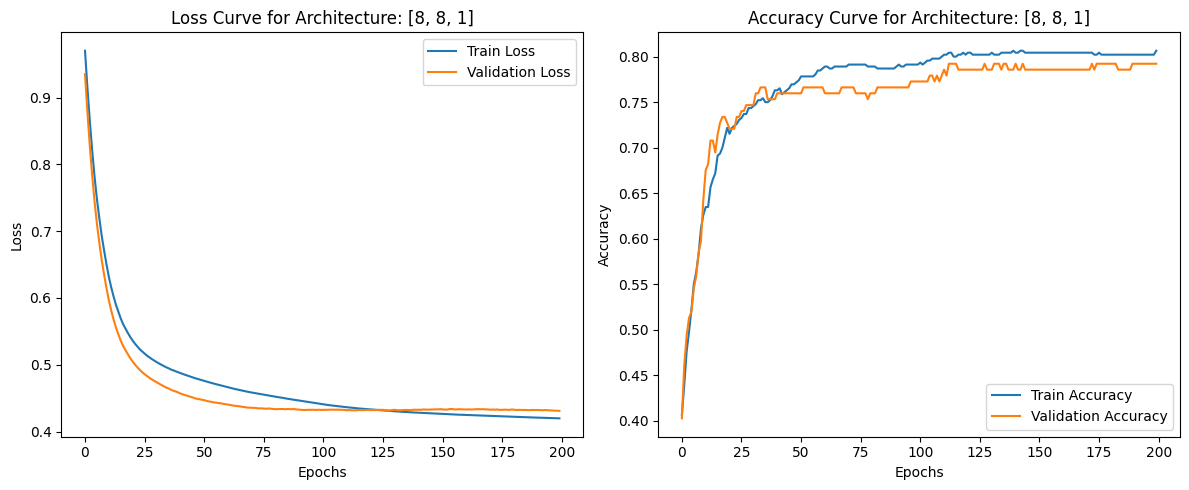


--- Testing Architecture 2: [8, 16, 8, 1] ---
Epoch 0, Train Loss: 0.7410, Val Loss: 0.7734, Train Acc: 0.5978, Val Acc: 0.5584
Epoch 10, Train Loss: 0.5208, Val Loss: 0.5304, Train Acc: 0.7413, Val Acc: 0.7403
Epoch 20, Train Loss: 0.4649, Val Loss: 0.4742, Train Acc: 0.7826, Val Acc: 0.7662
Epoch 30, Train Loss: 0.4393, Val Loss: 0.4607, Train Acc: 0.8065, Val Acc: 0.7792
Epoch 40, Train Loss: 0.4246, Val Loss: 0.4558, Train Acc: 0.8065, Val Acc: 0.7662
Epoch 50, Train Loss: 0.4141, Val Loss: 0.4550, Train Acc: 0.8087, Val Acc: 0.7662
Epoch 60, Train Loss: 0.4056, Val Loss: 0.4550, Train Acc: 0.8087, Val Acc: 0.7597
Epoch 70, Train Loss: 0.3984, Val Loss: 0.4554, Train Acc: 0.8022, Val Acc: 0.7597
Epoch 80, Train Loss: 0.3916, Val Loss: 0.4552, Train Acc: 0.8130, Val Acc: 0.7662
Epoch 90, Train Loss: 0.3851, Val Loss: 0.4548, Train Acc: 0.8217, Val Acc: 0.7662
Epoch 100, Train Loss: 0.3789, Val Loss: 0.4571, Train Acc: 0.8283, Val Acc: 0.7662
Epoch 110, Train Loss: 0.3730, Val Loss:

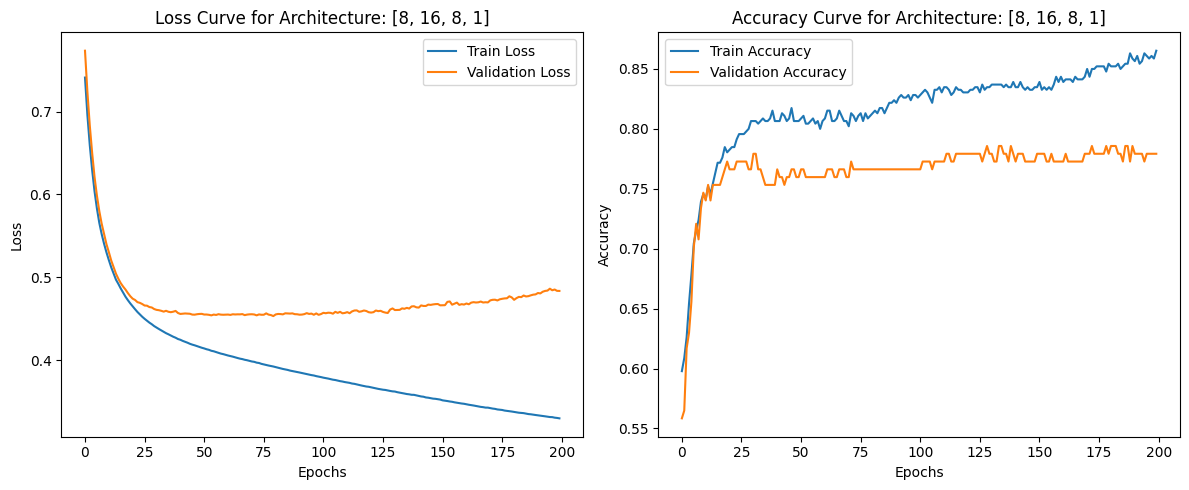


--- Testing Architecture 3: [8, 32, 16, 8, 1] ---
Epoch 0, Train Loss: 0.6054, Val Loss: 0.6063, Train Acc: 0.6587, Val Acc: 0.6299
Epoch 10, Train Loss: 0.4533, Val Loss: 0.4554, Train Acc: 0.7891, Val Acc: 0.7532
Epoch 20, Train Loss: 0.4070, Val Loss: 0.4613, Train Acc: 0.8239, Val Acc: 0.7662
Epoch 30, Train Loss: 0.3803, Val Loss: 0.4737, Train Acc: 0.8435, Val Acc: 0.7727
Epoch 40, Train Loss: 0.3580, Val Loss: 0.4773, Train Acc: 0.8522, Val Acc: 0.7727
Epoch 50, Train Loss: 0.3367, Val Loss: 0.4862, Train Acc: 0.8565, Val Acc: 0.7792
Epoch 60, Train Loss: 0.3168, Val Loss: 0.4976, Train Acc: 0.8630, Val Acc: 0.7662
Epoch 70, Train Loss: 0.2958, Val Loss: 0.5049, Train Acc: 0.8761, Val Acc: 0.7727
Epoch 80, Train Loss: 0.2707, Val Loss: 0.5242, Train Acc: 0.8913, Val Acc: 0.7662
Epoch 90, Train Loss: 0.2469, Val Loss: 0.5480, Train Acc: 0.9043, Val Acc: 0.7662
Epoch 100, Train Loss: 0.2242, Val Loss: 0.5813, Train Acc: 0.9174, Val Acc: 0.7727
Epoch 110, Train Loss: 0.2018, Val L

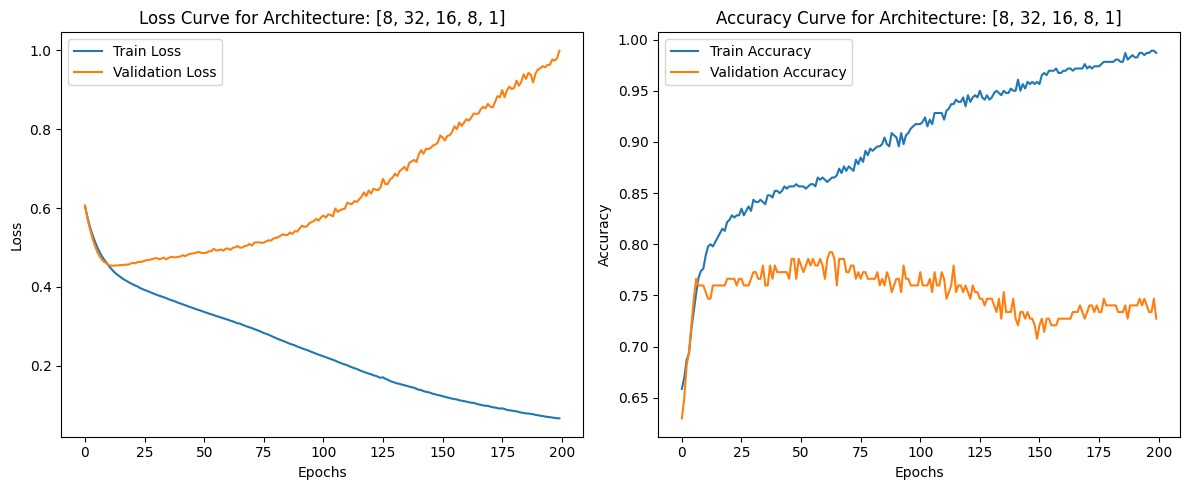


--- Testing Architecture 4: [8, 64, 32, 16, 8, 1] ---
Epoch 0, Train Loss: 0.6623, Val Loss: 0.6610, Train Acc: 0.6457, Val Acc: 0.6169
Epoch 10, Train Loss: 0.3931, Val Loss: 0.4559, Train Acc: 0.8217, Val Acc: 0.7792
Epoch 20, Train Loss: 0.3455, Val Loss: 0.4634, Train Acc: 0.8457, Val Acc: 0.7727
Epoch 30, Train Loss: 0.3025, Val Loss: 0.4782, Train Acc: 0.8587, Val Acc: 0.7662
Epoch 40, Train Loss: 0.2562, Val Loss: 0.4920, Train Acc: 0.8891, Val Acc: 0.7532
Epoch 50, Train Loss: 0.2321, Val Loss: 0.5543, Train Acc: 0.9130, Val Acc: 0.7597
Epoch 60, Train Loss: 0.1724, Val Loss: 0.6020, Train Acc: 0.9326, Val Acc: 0.7468
Epoch 70, Train Loss: 0.1361, Val Loss: 0.6840, Train Acc: 0.9630, Val Acc: 0.7403
Epoch 80, Train Loss: 0.1067, Val Loss: 0.7608, Train Acc: 0.9739, Val Acc: 0.7403
Epoch 90, Train Loss: 0.0852, Val Loss: 0.8491, Train Acc: 0.9804, Val Acc: 0.7273
Epoch 100, Train Loss: 0.0680, Val Loss: 0.9169, Train Acc: 0.9826, Val Acc: 0.7273
Epoch 110, Train Loss: 0.0545, V

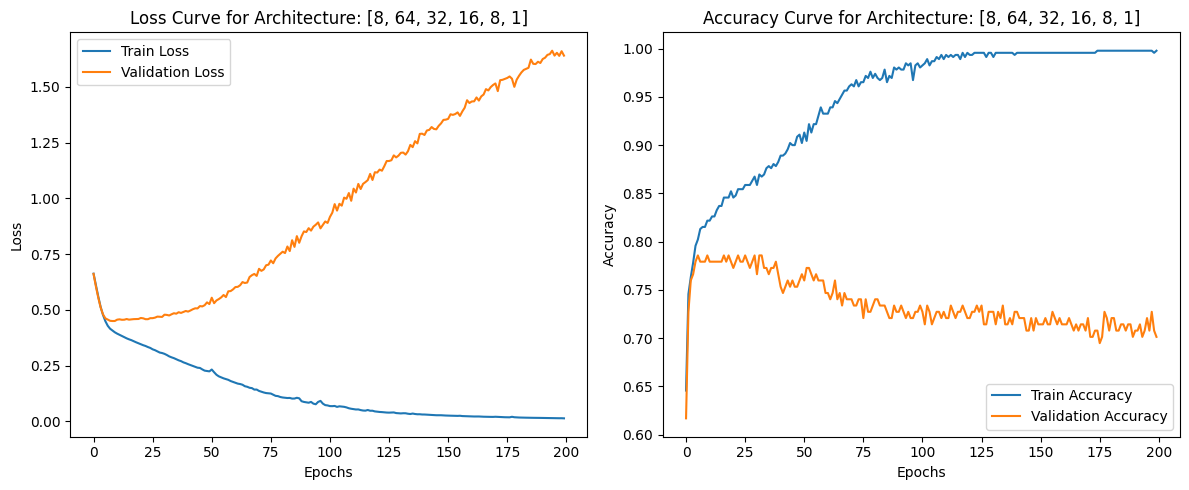


--- Summary of Test Set Performance ---
Architecture: [8, 8, 1]
  Test Loss: 0.5494
  Test Accuracy: 0.7078
--------------------
Architecture: [8, 16, 8, 1]
  Test Loss: 0.5613
  Test Accuracy: 0.7273
--------------------
Architecture: [8, 32, 16, 8, 1]
  Test Loss: 1.0931
  Test Accuracy: 0.7468
--------------------
Architecture: [8, 64, 32, 16, 8, 1]
  Test Loss: 2.3054
  Test Accuracy: 0.7078
--------------------


In [4]:
# prompt: Tester des architectures variées (ex. : [8, 32, 16, 8, 1]).

# Définir les architectures à tester
architectures = [
    [X_train.shape[1], 8, 1],  # Exemple simple (1 hidden layer)
    [X_train.shape[1], 16, 8, 1], # Architecture précédente (2 hidden layers)
    [X_train.shape[1], 32, 16, 8, 1], # Architecture avec 3 hidden layers
    [X_train.shape[1], 64, 32, 16, 8, 1] # Exemple avec 4 hidden layers
]

# Hyperparamètres communs
epochs = 200
batch_size = 32
learning_rate = 0.001 # Learning rate for Adam
lambda_reg = 0.01 # L2 regularization coefficient
beta1 = 0.9 # Adam parameter
beta2 = 0.999 # Adam parameter
epsilon = 1e-8 # Adam parameter


results = {}

# Tester chaque architecture
for i, layer_sizes in enumerate(architectures):
    print(f"\n--- Testing Architecture {i+1}: {layer_sizes} ---")

    # Créer une nouvelle instance du réseau de neurones avec l'architecture actuelle et Adam
    # Assurez-vous que la classe NeuralNetwork a été mise à jour pour inclure les paramètres Adam
    nn = NeuralNetwork(layer_sizes, learning_rate=learning_rate, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_reg=lambda_reg)

    # Entraîner le modèle
    train_losses, val_losses, train_accuracies, val_accuracies = nn.train(
        X_train, y_train, X_val, y_val, epochs=epochs, batch_size=batch_size
    )

    # Évaluer sur l'ensemble de test
    y_pred_test_proba = nn.forward(X_test)
    y_pred_test = (y_pred_test_proba > 0.5).astype(int)

    test_loss = nn.compute_loss(y_test, y_pred_test_proba)
    test_accuracy = nn.compute_accuracy(y_test, y_pred_test_proba) # Use probabilities for accuracy calculation function

    print(f"\nEvaluation on Test Set for Architecture {layer_sizes}:")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_test))

    # Stocker les résultats
    results[str(layer_sizes)] = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies,
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'classification_report': classification_report(y_test, y_pred_test, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred_test).tolist() # Store as list for easier handling
    }

    # Afficher les courbes de perte et d'accuracy pour cette architecture
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(train_losses, label='Train Loss')
    ax1.plot(val_losses, label='Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title(f'Loss Curve for Architecture: {layer_sizes}')
    ax1.legend()

    ax2.plot(train_accuracies, label='Train Accuracy')
    ax2.plot(val_accuracies, label='Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title(f'Accuracy Curve for Architecture: {layer_sizes}')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Optionnel: Afficher un résumé des performances sur l'ensemble de test pour toutes les architectures
print("\n--- Summary of Test Set Performance ---")
for arch, res in results.items():
    print(f"Architecture: {arch}")
    print(f"  Test Loss: {res['test_loss']:.4f}")
    print(f"  Test Accuracy: {res['test_accuracy']:.4f}")
    print("-" * 20)

Original training set shape: (460, 8) (460, 1)
Original training set class distribution:
 0    300
1    160
Name: count, dtype: int64

Resampled training set shape: (600, 8) (600, 1)
Resampled training set class distribution:
 0    300
1    300
Name: count, dtype: int64

--- Testing Architecture 1: [8, 8, 1] with Oversampling ---
Epoch 0, Train Loss: 0.8158, Val Loss: 0.9214, Train Acc: 0.5333, Val Acc: 0.4091
Epoch 10, Train Loss: 0.5879, Val Loss: 0.5776, Train Acc: 0.6883, Val Acc: 0.6753
Epoch 20, Train Loss: 0.5339, Val Loss: 0.5033, Train Acc: 0.7300, Val Acc: 0.7143
Epoch 30, Train Loss: 0.5051, Val Loss: 0.4772, Train Acc: 0.7383, Val Acc: 0.7338
Epoch 40, Train Loss: 0.4877, Val Loss: 0.4695, Train Acc: 0.7517, Val Acc: 0.7403
Epoch 50, Train Loss: 0.4756, Val Loss: 0.4693, Train Acc: 0.7533, Val Acc: 0.7532
Epoch 60, Train Loss: 0.4684, Val Loss: 0.4702, Train Acc: 0.7650, Val Acc: 0.7468
Epoch 70, Train Loss: 0.4629, Val Loss: 0.4717, Train Acc: 0.7717, Val Acc: 0.7338
Epoch

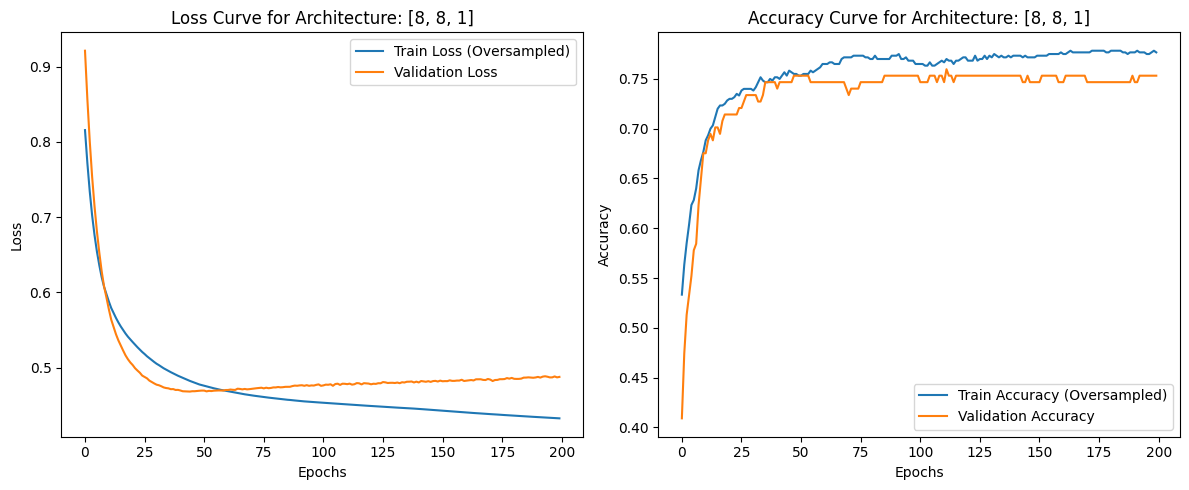


--- Testing Architecture 2: [8, 16, 8, 1] with Oversampling ---
Epoch 0, Train Loss: 0.8098, Val Loss: 0.7615, Train Acc: 0.4650, Val Acc: 0.5195
Epoch 10, Train Loss: 0.5191, Val Loss: 0.5460, Train Acc: 0.7450, Val Acc: 0.7208
Epoch 20, Train Loss: 0.4651, Val Loss: 0.5037, Train Acc: 0.7767, Val Acc: 0.7143
Epoch 30, Train Loss: 0.4389, Val Loss: 0.4937, Train Acc: 0.7950, Val Acc: 0.7338
Epoch 40, Train Loss: 0.4210, Val Loss: 0.4941, Train Acc: 0.8167, Val Acc: 0.7403
Epoch 50, Train Loss: 0.4061, Val Loss: 0.4940, Train Acc: 0.8383, Val Acc: 0.7403
Epoch 60, Train Loss: 0.3938, Val Loss: 0.4962, Train Acc: 0.8400, Val Acc: 0.7338
Epoch 70, Train Loss: 0.3827, Val Loss: 0.5023, Train Acc: 0.8417, Val Acc: 0.7403
Epoch 80, Train Loss: 0.3725, Val Loss: 0.5094, Train Acc: 0.8517, Val Acc: 0.7468
Epoch 90, Train Loss: 0.3624, Val Loss: 0.5126, Train Acc: 0.8583, Val Acc: 0.7597
Epoch 100, Train Loss: 0.3527, Val Loss: 0.5164, Train Acc: 0.8617, Val Acc: 0.7597
Epoch 110, Train Loss:

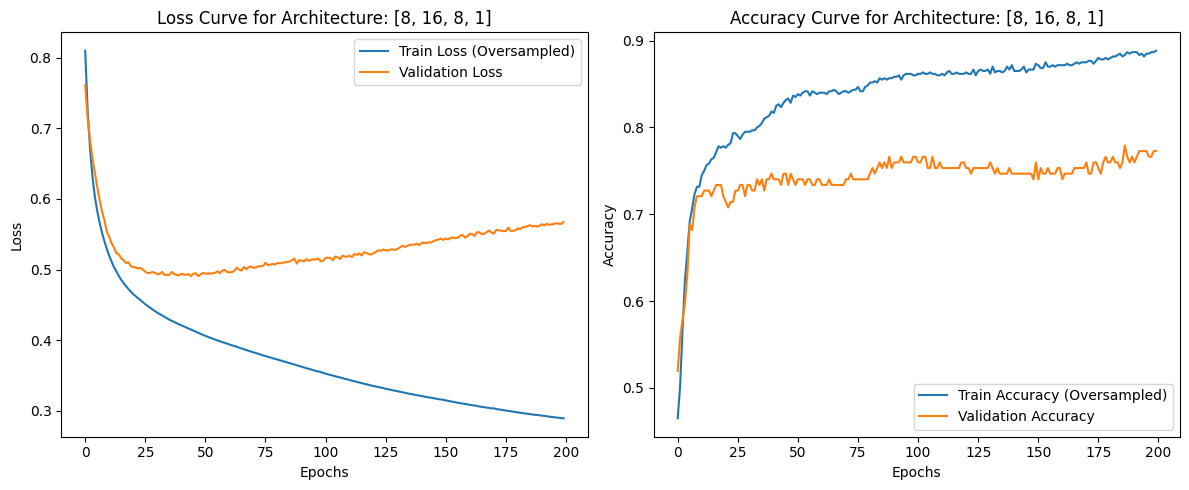


--- Testing Architecture 3: [8, 32, 16, 8, 1] with Oversampling ---
Epoch 0, Train Loss: 0.6414, Val Loss: 0.6133, Train Acc: 0.5833, Val Acc: 0.6623
Epoch 10, Train Loss: 0.4478, Val Loss: 0.4788, Train Acc: 0.7917, Val Acc: 0.7532
Epoch 20, Train Loss: 0.3923, Val Loss: 0.4942, Train Acc: 0.8250, Val Acc: 0.7597
Epoch 30, Train Loss: 0.3573, Val Loss: 0.5081, Train Acc: 0.8450, Val Acc: 0.7532
Epoch 40, Train Loss: 0.3245, Val Loss: 0.5287, Train Acc: 0.8667, Val Acc: 0.7273
Epoch 50, Train Loss: 0.2945, Val Loss: 0.5529, Train Acc: 0.8867, Val Acc: 0.7403
Epoch 60, Train Loss: 0.2646, Val Loss: 0.5786, Train Acc: 0.8983, Val Acc: 0.7338
Epoch 70, Train Loss: 0.2372, Val Loss: 0.6018, Train Acc: 0.9133, Val Acc: 0.7338
Epoch 80, Train Loss: 0.2113, Val Loss: 0.6252, Train Acc: 0.9317, Val Acc: 0.7403
Epoch 90, Train Loss: 0.1887, Val Loss: 0.6672, Train Acc: 0.9433, Val Acc: 0.7468
Epoch 100, Train Loss: 0.1639, Val Loss: 0.7033, Train Acc: 0.9517, Val Acc: 0.7338
Epoch 110, Train L

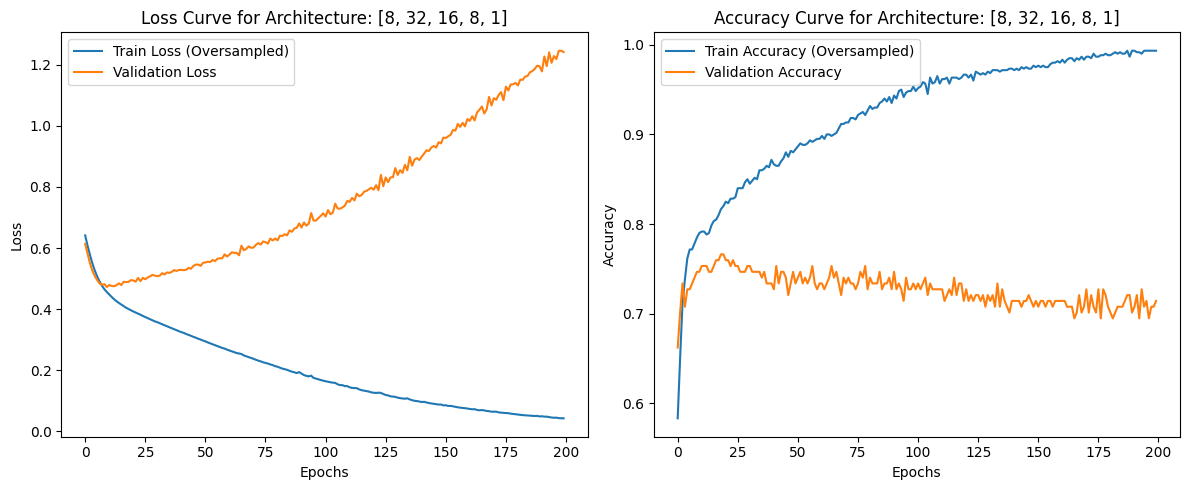


--- Testing Architecture 4: [8, 64, 32, 16, 8, 1] with Oversampling ---
Epoch 0, Train Loss: 0.6299, Val Loss: 0.6681, Train Acc: 0.6367, Val Acc: 0.6169
Epoch 10, Train Loss: 0.3813, Val Loss: 0.4813, Train Acc: 0.8200, Val Acc: 0.7403
Epoch 20, Train Loss: 0.3015, Val Loss: 0.4992, Train Acc: 0.8717, Val Acc: 0.7727
Epoch 30, Train Loss: 0.2260, Val Loss: 0.5635, Train Acc: 0.9200, Val Acc: 0.7403
Epoch 40, Train Loss: 0.1729, Val Loss: 0.6517, Train Acc: 0.9433, Val Acc: 0.7468
Epoch 50, Train Loss: 0.1243, Val Loss: 0.7441, Train Acc: 0.9717, Val Acc: 0.7208
Epoch 60, Train Loss: 0.0894, Val Loss: 0.8808, Train Acc: 0.9850, Val Acc: 0.7208
Epoch 70, Train Loss: 0.0631, Val Loss: 0.9984, Train Acc: 0.9900, Val Acc: 0.7273
Epoch 80, Train Loss: 0.0406, Val Loss: 1.1514, Train Acc: 0.9967, Val Acc: 0.7273
Epoch 90, Train Loss: 0.0274, Val Loss: 1.2492, Train Acc: 0.9983, Val Acc: 0.7273
Epoch 100, Train Loss: 0.0199, Val Loss: 1.4007, Train Acc: 0.9983, Val Acc: 0.7208
Epoch 110, Tra

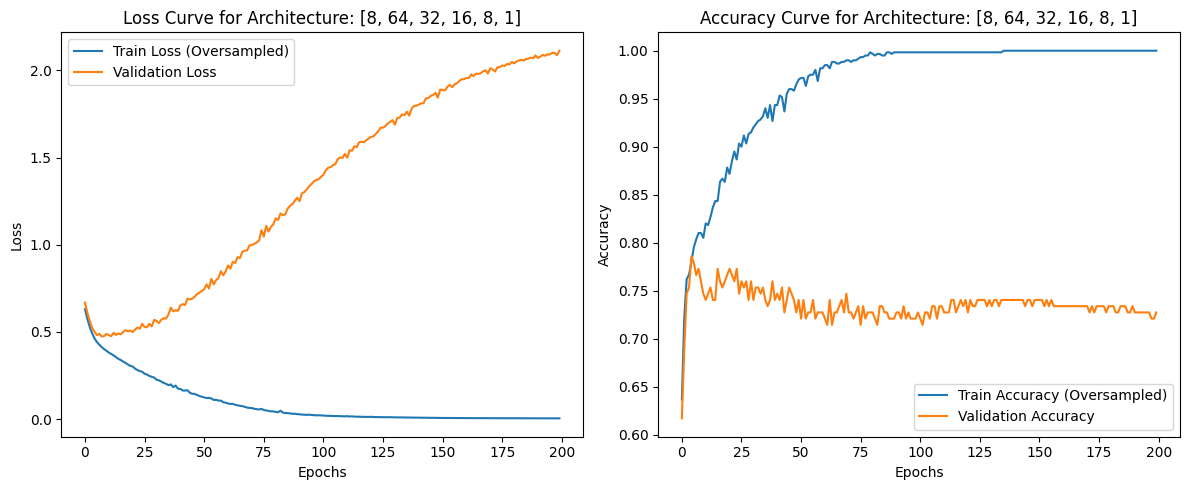


--- Summary of Test Set Performance with Oversampling ---
Architecture: [8, 8, 1]
  Test Loss: 0.6134
  Test Accuracy: 0.7078
--------------------
Architecture: [8, 16, 8, 1]
  Test Loss: 0.6175
  Test Accuracy: 0.7208
--------------------
Architecture: [8, 32, 16, 8, 1]
  Test Loss: 1.3330
  Test Accuracy: 0.7013
--------------------
Architecture: [8, 64, 32, 16, 8, 1]
  Test Loss: 2.4799
  Test Accuracy: 0.7338
--------------------


In [6]:
# prompt: we want to equilibrate the classes with oversamling

from imblearn.over_sampling import SMOTE

# Check the distribution of the target variable in the training set
print("Original training set shape:", X_train.shape, y_train.shape)
print("Original training set class distribution:\n", pd.Series(y_train.flatten()).value_counts())

# Apply SMOTE to the training data
# Reshape y_train to be 1D for SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train.flatten()) # fit_resample takes 1D y

# Reshape y_train_res back to a column vector to match the network's output shape
y_train_res = y_train_res.reshape(-1, 1)

print("\nResampled training set shape:", X_train_res.shape, y_train_res.shape)
print("Resampled training set class distribution:\n", pd.Series(y_train_res.flatten()).value_counts())

# Now, use X_train_res and y_train_res for training the neural network
# The validation and test sets remain unchanged.


# Définir les architectures à tester
architectures = [
    [X_train_res.shape[1], 8, 1],  # Exemple simple (1 hidden layer)
    [X_train_res.shape[1], 16, 8, 1], # Architecture précédente (2 hidden layers)
    [X_train_res.shape[1], 32, 16, 8, 1], # Architecture avec 3 hidden layers
    [X_train_res.shape[1], 64, 32, 16, 8, 1] # Exemple avec 4 hidden layers
]

# Hyperparamètres communs
epochs = 200
batch_size = 32
learning_rate = 0.001 # Learning rate for Adam
lambda_reg = 0.01 # L2 regularization coefficient
beta1 = 0.9 # Adam parameter
beta2 = 0.999 # Adam parameter
epsilon = 1e-8 # Adam parameter

results = {}

# Tester chaque architecture avec les données suréchantillonnées
for i, layer_sizes in enumerate(architectures):
    print(f"\n--- Testing Architecture {i+1}: {layer_sizes} with Oversampling ---")

    # Créer une nouvelle instance du réseau de neurones avec l'architecture actuelle et Adam
    nn = NeuralNetwork(layer_sizes, learning_rate=learning_rate, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_reg=lambda_reg)

    # Entraîner le modèle avec les données d'entraînement suréchantillonnées
    train_losses, val_losses, train_accuracies, val_accuracies = nn.train(
        X_train_res, y_train_res, X_val, y_val, epochs=epochs, batch_size=batch_size
    )

    # Évaluer sur l'ensemble de test (NON-oversampled)
    y_pred_test_proba = nn.forward(X_test)
    y_pred_test = (y_pred_test_proba > 0.5).astype(int)

    test_loss = nn.compute_loss(y_test, y_pred_test_proba)
    test_accuracy = nn.compute_accuracy(y_test, y_pred_test_proba)

    print(f"\nEvaluation on Test Set for Architecture {layer_sizes}:")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_test))

    # Stocker les résultats
    results[str(layer_sizes)] = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies,
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'classification_report': classification_report(y_test, y_pred_test, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred_test).tolist()
    }

    # Afficher les courbes de perte et d'accuracy pour cette architecture
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(train_losses, label='Train Loss (Oversampled)')
    ax1.plot(val_losses, label='Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title(f'Loss Curve for Architecture: {layer_sizes}')
    ax1.legend()

    ax2.plot(train_accuracies, label='Train Accuracy (Oversampled)')
    ax2.plot(val_accuracies, label='Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title(f'Accuracy Curve for Architecture: {layer_sizes}')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Optionnel: Afficher un résumé des performances sur l'ensemble de test pour toutes les architectures
print("\n--- Summary of Test Set Performance with Oversampling ---")
for arch, res in results.items():
    print(f"Architecture: {arch}")
    print(f"  Test Loss: {res['test_loss']:.4f}")
    print(f"  Test Accuracy: {res['test_accuracy']:.4f}")
    print("-" * 20)



Testing the architecture with 3 hidden layers as requested:
Epoch 0, Train Loss: 0.6414, Val Loss: 0.6133, Train Acc: 0.5833, Val Acc: 0.6623
Epoch 10, Train Loss: 0.4478, Val Loss: 0.4788, Train Acc: 0.7917, Val Acc: 0.7532
Epoch 20, Train Loss: 0.3923, Val Loss: 0.4942, Train Acc: 0.8250, Val Acc: 0.7597
Epoch 30, Train Loss: 0.3573, Val Loss: 0.5081, Train Acc: 0.8450, Val Acc: 0.7532
Epoch 40, Train Loss: 0.3245, Val Loss: 0.5287, Train Acc: 0.8667, Val Acc: 0.7273
Epoch 50, Train Loss: 0.2945, Val Loss: 0.5529, Train Acc: 0.8867, Val Acc: 0.7403
Epoch 60, Train Loss: 0.2646, Val Loss: 0.5786, Train Acc: 0.8983, Val Acc: 0.7338
Epoch 70, Train Loss: 0.2372, Val Loss: 0.6018, Train Acc: 0.9133, Val Acc: 0.7338
Epoch 80, Train Loss: 0.2113, Val Loss: 0.6252, Train Acc: 0.9317, Val Acc: 0.7403
Epoch 90, Train Loss: 0.1887, Val Loss: 0.6672, Train Acc: 0.9433, Val Acc: 0.7468
Epoch 100, Train Loss: 0.1639, Val Loss: 0.7033, Train Acc: 0.9517, Val Acc: 0.7338
Epoch 110, Train Loss: 0.1

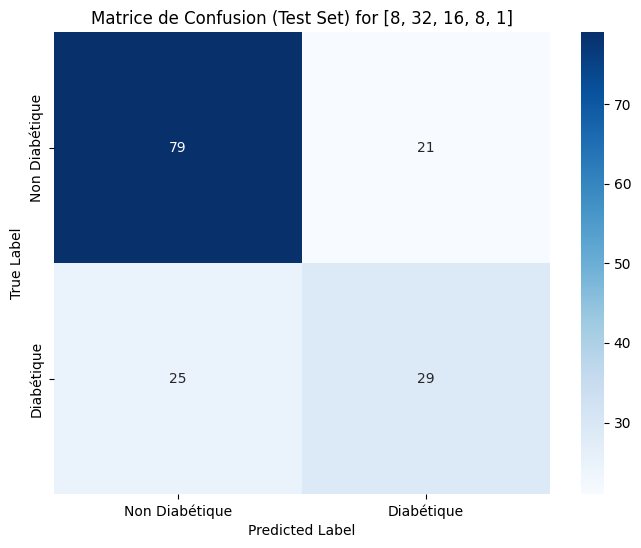

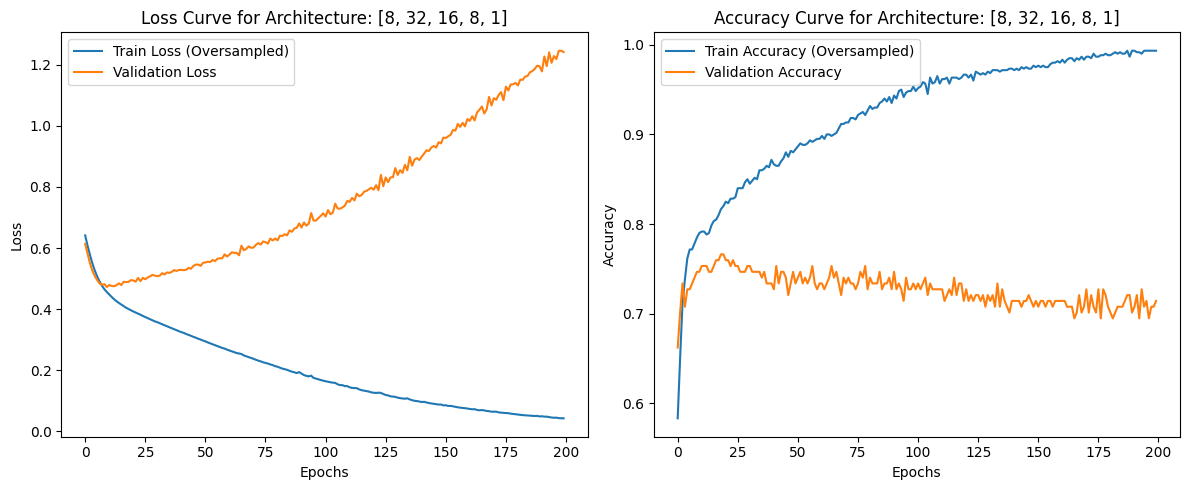

In [7]:
# prompt: tester et ajouter au code précédent*
#   layer_sizes = [X_train.shape[1], 32, 16, 8, 1]
#  2 nn = NeuralNetwork(layer_sizes, learning_rate=0.01)
#  3 losses = nn.train(X_train, y_train, epochs=100, batch_size=32)

# tester l'architecture avec 3 couches cachées
print("\nTesting the architecture with 3 hidden layers as requested:")
layer_sizes_test = [X_train.shape[1], 32, 16, 8, 1]
nn_test = NeuralNetwork(layer_sizes_test, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, lambda_reg=0.01)
train_losses_test, val_losses_test, train_acc_test, val_acc_test = nn_test.train(X_train_res, y_train_res, X_val, y_val, epochs=epochs, batch_size=batch_size)
print("Testing finished for the 3-hidden-layer architecture with Adam and Oversampling.")

# Évaluer sur l'ensemble de test
y_pred_test_proba_test = nn_test.forward(X_test)
y_pred_test_test = (y_pred_test_proba_test > 0.5).astype(int)

test_loss_test = nn_test.compute_loss(y_test, y_pred_test_proba_test)
test_accuracy_test = nn_test.compute_accuracy(y_test, y_pred_test_proba_test)

print(f"\nEvaluation on Test Set for Tested Architecture {layer_sizes_test}:")
print(f"Test Loss: {test_loss_test:.4f}")
print(f"Test Accuracy: {test_accuracy_test:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_test_test))

# Matrice de confusion pour l'architecture testée
cm_test = confusion_matrix(y_test, y_pred_test_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Diabétique', 'Diabétique'], yticklabels=['Non Diabétique', 'Diabétique'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Matrice de Confusion (Test Set) for {layer_sizes_test}')
plt.show()

# Courbes de perte et d'accuracy pour l'architecture testée
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(train_losses_test, label='Train Loss (Oversampled)')
ax1.plot(val_losses_test, label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title(f'Loss Curve for Architecture: {layer_sizes_test}')
ax1.legend()

ax2.plot(train_acc_test, label='Train Accuracy (Oversampled)')
ax2.plot(val_acc_test, label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title(f'Accuracy Curve for Architecture: {layer_sizes_test}')
ax2.legend()

plt.tight_layout()
plt.show()